In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
df.shape

(100, 4)

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt

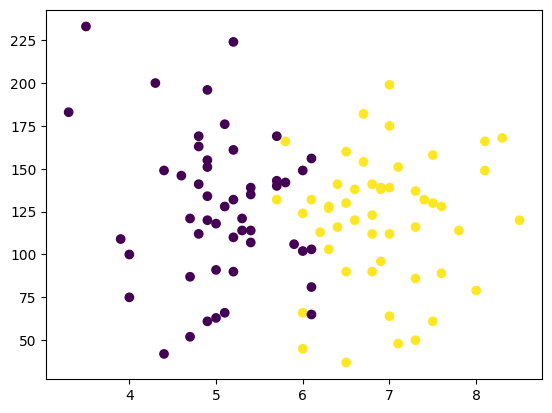

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y.shape

(100,)

In [ ]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [ ]:
X_train

,cgpa,iq
58,8.0,79.0
50,3.5,233.0
90,7.3,86.0
24,4.7,121.0
73,4.9,61.0
...,...,...
53,8.3,168.0
13,6.4,116.0
55,7.8,114.0
8,6.1,156.0


In [ ]:
y_train

58    1
50    0
90    1
24    0
73    0
     ..
53    1
13    1
55    1
8     0
18    0
Name: placement, Length: 90, dtype: int64

In [ ]:
X_test

,cgpa,iq
0,6.8,123.0
29,7.0,112.0
82,6.5,37.0
78,6.1,81.0
85,5.8,166.0
91,7.5,158.0
17,3.3,183.0
47,5.2,161.0
46,5.3,114.0
74,6.7,154.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:

X_train = scaler.fit_transform(X_train)

In [ ]:

X_train

array([[ 1.76955655, -1.11711475],
       [-2.18776207,  2.79377448],
       [ 1.15397365, -0.93934706],
       [-1.13247711, -0.0505086 ],
       [-0.95659628, -1.57423168],
       [ 0.01074827,  0.66056217],
       [-1.48423876,  1.95572679],
       [ 0.802212  , -0.68539322],
       [-1.04453669,  0.45739909],
       [-0.69277504, -0.32985783],
       [-0.07719214, -0.43143937],
       [ 0.53839076, -0.07590398],
       [ 0.1866291 , -0.25367168],
       [ 1.41779489, -0.86316091],
       [-0.25307297,  0.43200371],
       [ 1.15397365, -1.85358091],
       [-1.39629835,  0.66056217],
       [ 0.97809283,  0.71135294],
       [-0.86865587, -0.12669475],
       [-0.51689421,  0.30502679],
       [ 0.09868869, -0.50762552],
       [-0.95659628, -0.07590398],
       [ 0.62633117,  1.49860987],
       [ 0.89015241,  0.40660833],
       [ 0.01074827, -1.44725476],
       [-0.78071545,  1.34623756],
       [ 0.27456951,  0.10186371],
       [ 0.01074827, -0.53302091],
       [ 0.09868869,

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[ 7.14271584e-01,  2.82170941e-04],
       [ 8.90152412e-01, -2.79067060e-01],
       [ 4.50450342e-01, -2.18372091e+00],
       [ 9.86886867e-02, -1.06632399e+00],
       [-1.65132555e-01,  1.09228371e+00],
       [ 1.32985448e+00,  8.89120634e-01],
       [-2.36364290e+00,  1.52400525e+00],
       [-6.92775038e-01,  9.65306788e-01],
       [-6.04834624e-01, -2.28276291e-01],
       [ 6.26331170e-01,  7.87539096e-01]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:

y_test

0     1
29    1
82    1
78    0
85    1
91    1
17    0
47    0
46    0
74    1
Name: placement, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.8

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

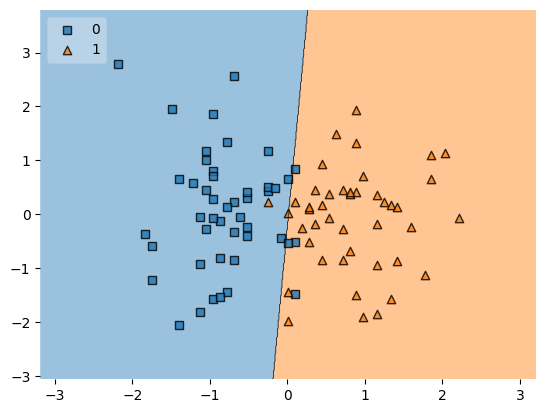

In [ ]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))